In [52]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.inferno
matplotlib.__version__
import scipy as sp
from scipy.integrate import quad

In [53]:
def integrandx(phi,x_R,y_R,z_R):
    s_prime = 1 + 0.75 * np.sin(3 * phi)
    x_prime = s_prime * np.cos(phi)
    y_prime = s_prime * np.sin(phi)
    r = np.sqrt((x_R - x_prime) ** 2 + (y_R - y_prime) ** 2 + z_R ** 2)
    dy = 0.75 * 3 * np.cos(3 * phi) * np.sin(phi) + s_prime * np.cos(phi)
    return z_R * dy / r ** 3

def integrandy(phi,x_R,y_R,z_R):
    s_prime = 1 + 0.75 * np.sin(3 * phi)
    x_prime = s_prime * np.cos(phi)
    y_prime = s_prime * np.sin(phi)
    r = np.sqrt((x_R - x_prime) ** 2 + (y_R - y_prime) ** 2 + z_R ** 2)
    dx = 0.75 * 3 * np.cos(3 * phi) * np.cos(phi) - s_prime * np.sin(phi)
    return z_R * dx / r ** 3

def integrandz(phi,x_R,y_R,z_R):
    s_prime = 1 + 0.75 * np.sin(3 * phi)
    x_prime = s_prime * np.cos(phi)
    y_prime = s_prime * np.sin(phi)
    r = np.sqrt((x_R - x_prime) ** 2 + (y_R - y_prime) ** 2 + z_R ** 2)
    dx = 0.75 * 3 * np.cos(3 * phi) * np.cos(phi) - s_prime * np.sin(phi)
    dy = 0.75 * 3 * np.cos(3 * phi) * np.sin(phi) + s_prime * np.cos(phi)
    return (((y_R - y_prime) * dx) - ((x_R - x_prime) * dy)) / r ** 3

In [54]:
def B_x(x_R,y_R,z_R):
    return quad(integrandx, 0, 2*np.pi, args=(x_R, y_R, z_R))[0]

def B_y(x_R,y_R,z_R):
    return quad(integrandy, 0, 2*np.pi, args=(x_R, y_R, z_R))[0]

def B_z(x_R,y_R,z_R):
    return quad(integrandz, 0, 2*np.pi, args=(x_R, y_R, z_R))[0]

#### b)

In [55]:
#For heat plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xh, yh = np.meshgrid(x, y)

In [56]:
#For quivers
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
xq, yq = np.meshgrid(x, y)

In [57]:
# For heat plot
mag_field_z1 = np.vectorize(B_z)(xh, yh, -0.5)
mag_field_z2 = np.vectorize(B_z)(xh, yh, -0.25)
mag_field_z3 = np.vectorize(B_z)(xh, yh, 0.25)
mag_field_z4 = np.vectorize(B_z)(xh, yh, 0.5)
# For quiver plot
mag_field_x1 = np.vectorize(B_x)(xq, yq, -0.5)
mag_field_y1 = np.vectorize(B_y)(xq, yq, -0.5)
mag_field_x2 = np.vectorize(B_x)(xq, yq, -0.25)
mag_field_y2 = np.vectorize(B_y)(xq, yq, -0.25)
mag_field_x3 = np.vectorize(B_x)(xq, yq, 0.25)
mag_field_y3 = np.vectorize(B_y)(xq, yq, 0.25)
mag_field_x4 = np.vectorize(B_x)(xq, yq, 0.5)
mag_field_y4 = np.vectorize(B_y)(xq, yq, 0.5)

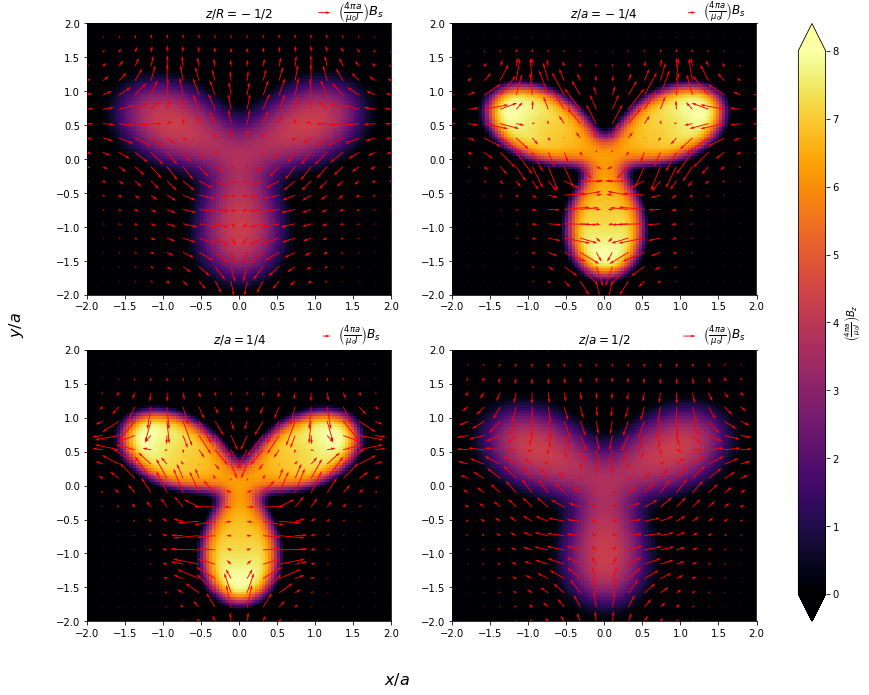

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15,11))

ax = axes[0,0]
cs = ax.pcolor(xh, yh, mag_field_z1, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x1, mag_field_y1, units='width', color='r')
ax.set_title('$z/R = -1/2$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$ \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':13})

# Upper Right
ax = axes[0,1]
cs = ax.pcolor(xh, yh, mag_field_z2, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x2, mag_field_y2, units='width', color='r')
ax.set_title('$z/a = -1/4$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$ \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

# Lower Left
ax = axes[1,0]
cs = ax.pcolor(xh, yh, mag_field_z3, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x3, mag_field_y3, units='width', color='r')
ax.set_title('$z/a = 1/4$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$ \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

# Lower Right
ax = axes[1,1]
cs = ax.pcolor(xh, yh, mag_field_z4, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x4, mag_field_y4, units='width', color='r')
ax.set_title('$z/a = 1/2$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$ \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})


cbar = fig.colorbar(cs, ax=axes, extend='both', label=r'$\left( \frac{4 \pi a}{\mu_0 I} \right)B_z$')
fig.text(0.4, 0.045, '$x/a$', fontsize=16)
fig.text(0.06, 0.5, '$y/a$', ha='center', va='center', rotation='vertical', fontsize=16)
plt.show()

### c)

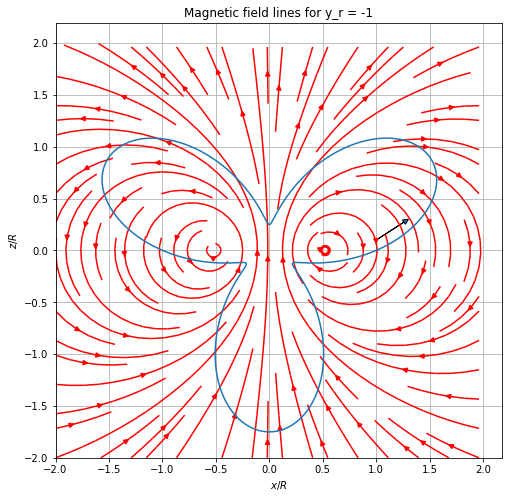

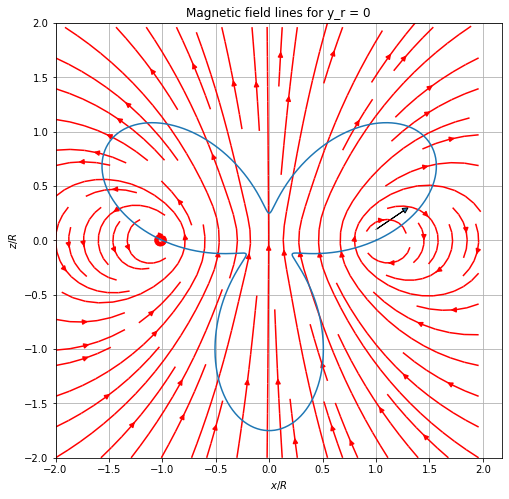

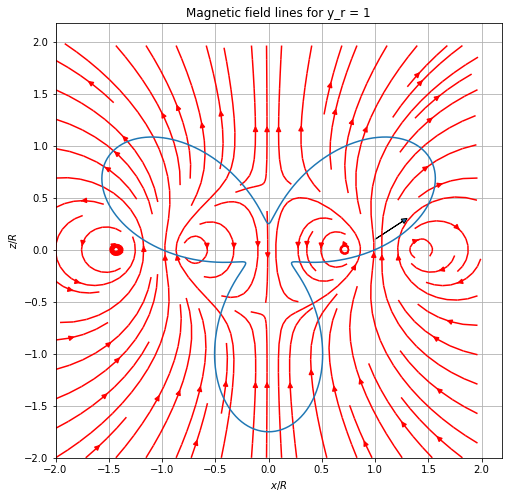

In [59]:
a = 0.75
N = 3
phi = np.linspace(0,2*np.pi,1000)
x = (1+a*np.sin(N*phi))*np.cos(phi)
y = (1+a*np.sin(N*phi))*np.sin(phi)

x1 = np.linspace(-2, 2, 40)
z1 = np.linspace(-2, 2, 40)
xd, zd = np.meshgrid(x1, z1)

y_cases = [-1,0,1]
#Plotting the streamline plots for the varying cases
for i in y_cases:
    mag_field_x = np.vectorize(B_x)(xd, i, zd)
    mag_field_z = np.vectorize(B_z)(xd, i, zd)

    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.streamplot(xd, zd, mag_field_x, mag_field_z, color='r')
    ax.plot(x,y)
    ax.set(xlabel='$x/R$', ylabel='$z/R$', title = "Magnetic field lines for y_r = %s" % i)
    ax.grid()
    plt.arrow(1,0.1,0.3,0.2, length_includes_head = True, head_width = 0.05, head_length = 0.05)
    plt.show()

#### d)

In [67]:
#Function for equation given
def integrandb(alpha, x_R, y_R, z_R):
    return B_x(x_R,y_R,z_R) * np.sin(alpha) + B_z(x_R,y_R,z_R) * np.cos(alpha)

def B(n,x_R,y_R,z_R):
    return (n / (4*np.pi)) * quad(integrandb, 0, 2*np.pi,args=(x_R, y_R, z_R))[0]

In [68]:
x_R = -2
z_R = 0
y_R = 1
#Finding B values for varying n
n = [0,1,2,3,4,5,6,7,8,9,10]
b = []
for i in n:
    b_vals = B(i,x_R,y_R,z_R)
    b.append(b_vals)

In [80]:
b #In Amperes

[-0.0,
 -2.0816681711721685e-17,
 -4.163336342344337e-17,
 -6.245004513516506e-17,
 -8.326672684688674e-17,
 -1.0408340855860843e-16,
 -1.249000902703301e-16,
 -1.4571677198205182e-16,
 -1.6653345369377348e-16,
 -1.8735013540549517e-16,
 -2.0816681711721685e-16]

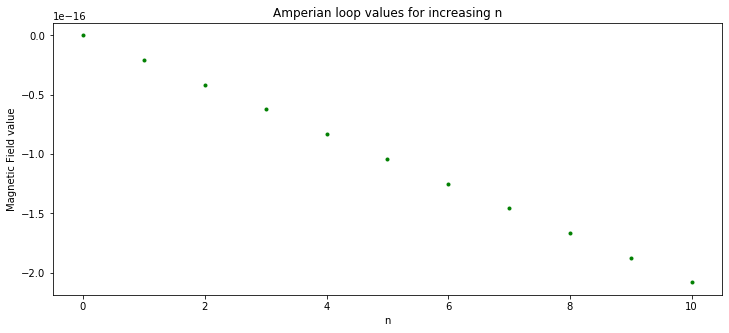

In [79]:
plt.figure(figsize = (12,5))
plt.plot(n,b, '.', color = 'g')
plt.xlabel("n")
plt.ylabel("Magnetic Field value")
plt.title("Amperian loop values for increasing n")
plt.show()

The above plot shows the magnetic field created by each wire. Since the radius of each circle depends on the number $n$, each circle's radius increases. The plot above shows that as the radius of the circle increases, the magnitude of the enclosed magnetic field increases as well. The result is in the negative's because the current is flowing counter clockwise.